In [1]:
import pandas as pd
import numpy as np

# Part 1

In [2]:
x = np.array([i[:-1].replace(' -> ', ',').split(',') for i in open('inputs/day05.txt')], 
         dtype=int)
# x1,y1 -> x2,y2

In [3]:
x.shape

(500, 4)

>For now, only consider horizontal and vertical lines: lines where either x1 = x2 or y1 = y2.

In [4]:
x = x[(x[:,0] == x[:,2]) | (x[:,1] == x[:,3])]

In [5]:
x.shape

(337, 4)

In [6]:
z = np.zeros([x.max()+1]*2, dtype=int)

In [7]:
z = np.zeros([x.max()+1]*2, dtype=int)
for i in range(x.shape[0]):
    x1, y1, x2, y2 = x[i]
    if (x1 == x2) and (y1 == y2):
        z[x1, y1] += 1
    elif x1 == x2:
        start, end = sorted([y1, y2])
        z[x1, start:end+1] += 1
    else:
        start, end = sorted([x1, x2])
        z[start:end+1, y1] += 1

In [8]:
import matplotlib.pyplot as plt

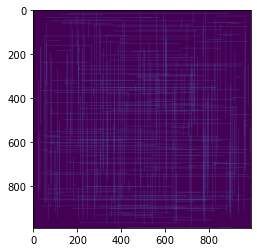

In [9]:
plt.imshow(z)

In [10]:
(z >= 2).sum()

7318

# Part 2

In [11]:
x = np.array([i[:-1].replace(' -> ', ',').split(',') for i in open('inputs/day05.txt')], 
         dtype=int)
# x1,y1 -> x2,y2

In [12]:
# diag criterion added
x = x[(np.abs(x[:, 0] - x[:, 2]) == np.abs(x[:, 1] - x[:, 3]))
      | (x[:,0] == x[:,2]) | (x[:,1] == x[:,3])]

In [13]:
z = np.zeros([x.max()+1]*2, dtype=int)
for i in range(x.shape[0]):
    x1, y1, x2, y2 = x[i]
    if (x1 == x2) and (y1 == y2):#point
        z[x1, y1] += 1
    elif x1 == x2:#hline
        start, end = sorted([y1, y2])
        z[x1, start:end+1] += 1
    elif y1 == y2:#vline
        start, end = sorted([x1, x2])
        z[start:end+1, y1] += 1
    else:#diag
        npts = abs(x1 - x2) + 1
        z[np.linspace(x1, x2, npts).astype(int), np.linspace(y1, y2, npts).astype(int)] += 1

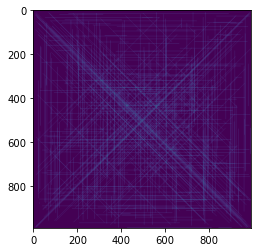

In [14]:
plt.imshow(z)

In [15]:
(z >= 2).sum()

19939